# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Sleep.csv')

df.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


In [27]:
numeric_cols = ["Body", "Brain", "SWsleep", "Parasleep", "Totsleep", "Life", "Gest", "Pred", "Exposure", "Danger"]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

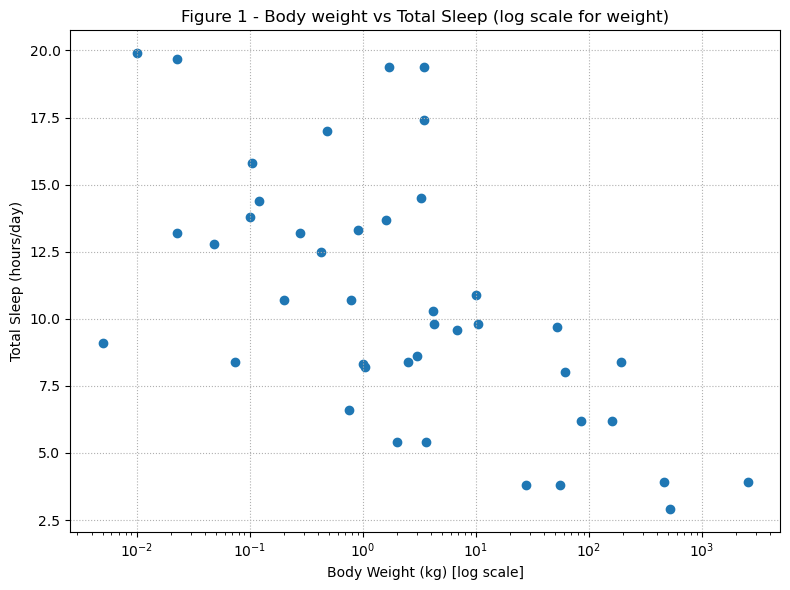

Figure 1 explanation: This scatter plot displays each species' body weight against its total sleep (hours per day).
Interpretation: Smaller mammals tend to cluster at higher total sleep hours while many large mammals sleep fewer hours, indicating an inverse relationship between body size and sleep duration for many species.


In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df["Body"], df["Totsleep"])
plt.xscale("log")
plt.xlabel("Body Weight (kg) [log scale]")
plt.ylabel("Total Sleep (hours/day)")
plt.title("Figure 1 - Body weight vs Total Sleep (log scale for weight)")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

print("Figure 1 explanation: This scatter plot displays each species' body weight against its total sleep (hours per day).\n"
      "Interpretation: Smaller mammals tend to cluster at higher total sleep hours while many large mammals sleep fewer hours, indicating an inverse relationship between body size and sleep duration for many species.")


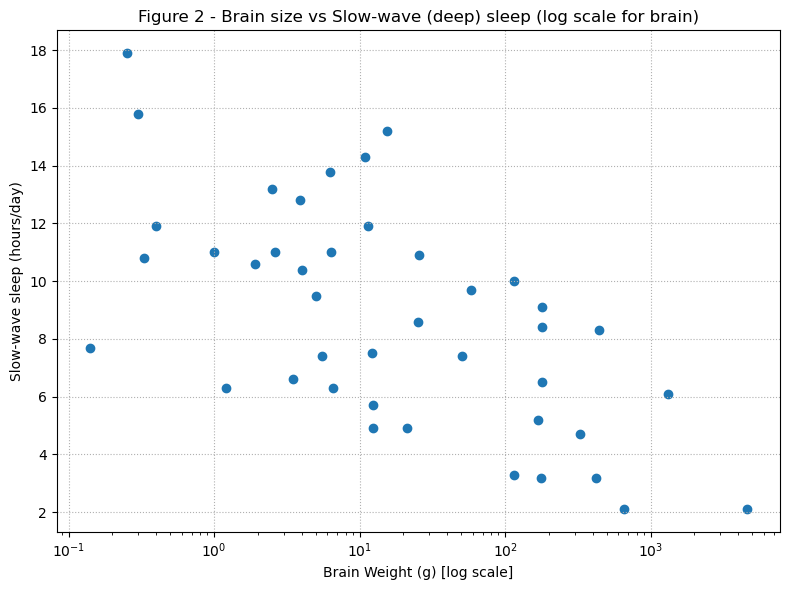

Figure 2 explanation: This scatter plot shows brain weight (grams) versus slow-wave sleep hours for each species.
Interpretation: There's no simple linear relationship - some animals with relatively large brains still have moderate amounts of deep sleep, while some small-brained animals show high SWS; this suggests other ecological or physiological factors influence deep sleep amount.


In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df["Brain"], df["SWsleep"])
plt.xscale("log")
plt.xlabel("Brain Weight (g) [log scale]")
plt.ylabel("Slow-wave sleep (hours/day)")
plt.title("Figure 2 - Brain size vs Slow-wave (deep) sleep (log scale for brain)")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

print("Figure 2 explanation: This scatter plot shows brain weight (grams) versus slow-wave sleep hours for each species.\n"
      "Interpretation: There's no simple linear relationship - some animals with relatively large brains still have moderate amounts of deep sleep, while some small-brained animals show high SWS; this suggests other ecological or physiological factors influence deep sleep amount.")


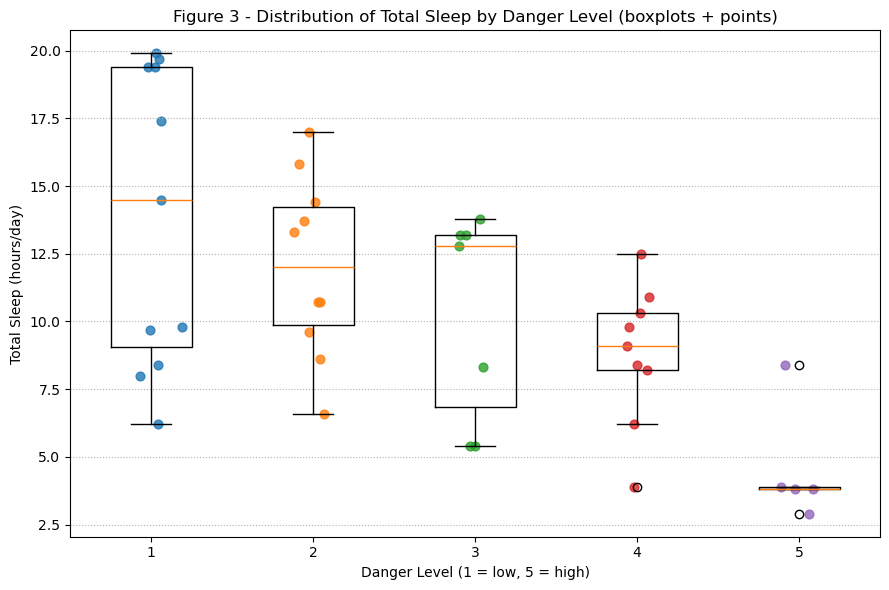

Figure 3 explanation: Boxplots show how total sleep hours are distributed for species at each 'Danger' level, with individual species overlaid as points.
Interpretation: If species facing higher environmental danger (higher 'Danger' score) sleep less on average, we might see lower medians at larger danger values; the plot helps reveal whether there's a downward trend or if sleep varies more due to species-specific traits.


In [25]:
danger_levels = sorted(df["Danger"].unique())
groups = [df.loc[df["Danger"] == d, "Totsleep"].dropna().values for d in danger_levels]

plt.figure(figsize=(9,6))
plt.boxplot(groups, labels=[str(int(d)) for d in danger_levels], patch_artist=False)
for i, d in enumerate(danger_levels):
    y = df.loc[df["Danger"] == d, "Totsleep"].dropna().values
    x = np.random.normal(i+1, 0.06, size=len(y))
    plt.scatter(x, y, alpha=0.8, s=40)
plt.xlabel("Danger Level (1 = low, 5 = high)")
plt.ylabel("Total Sleep (hours/day)")
plt.title("Figure 3 - Distribution of Total Sleep by Danger Level (boxplots + points)")
plt.grid(True, axis='y', linestyle=':')
plt.tight_layout()
plt.show()

print("Figure 3 explanation: Boxplots show how total sleep hours are distributed for species at each 'Danger' level, with individual species overlaid as points.\n"
      "Interpretation: If species facing higher environmental danger (higher 'Danger' score) sleep less on average, we might see lower medians at larger danger values; the plot helps reveal whether there's a downward trend or if sleep varies more due to species-specific traits.")
          